In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For Regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# For Classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Make graphs look nice
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
df = pd.read_csv('Loan_approval_data_2025_ModelReady.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          50000 non-null  int64  
 1   age                                  50000 non-null  int64  
 2   occupation_status                    50000 non-null  int64  
 3   years_employed                       50000 non-null  float64
 4   annual_income                        50000 non-null  int64  
 5   credit_score                         50000 non-null  int64  
 6   credit_history_years                 50000 non-null  float64
 7   savings_assets                       50000 non-null  int64  
 8   current_debt                         50000 non-null  int64  
 9   defaults_on_file                     50000 non-null  int64  
 10  delinquencies_last_2yrs              50000 non-null  int64  
 11  derogatory_marks            

In [4]:
print(df.columns)

df["loan_status"]

Index(['customer_id', 'age', 'occupation_status', 'years_employed',
       'annual_income', 'credit_score', 'credit_history_years',
       'savings_assets', 'current_debt', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'product_type',
       'loan_intent', 'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status',
       'future_net_worth', 'current_debt_to_current_asset_ratio',
       'current_asset_to_current_debt_ratio', 'increase_in_debt',
       'all_debt_to_all_asset_ratio', 'all_asset_to_all_debt_ratio',
       'payment_made', 'total_interest_due_on_loan', 'interest_over_payment',
       'credit_score_per_age', 'credit_score_per_history',
       'age_started_using_credit', 'age_started_at_current_work',
       'working_credit_years', 'penalty_score_card'],
      dtype='object')


0        1
1        0
2        1
3        1
4        1
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: loan_status, Length: 50000, dtype: int64

In [5]:
numeric_features = df.select_dtypes(include='number').drop(columns='customer_id')
#len(numeric_features.columns)
numeric_features.columns


Index(['age', 'occupation_status', 'years_employed', 'annual_income',
       'credit_score', 'credit_history_years', 'savings_assets',
       'current_debt', 'defaults_on_file', 'delinquencies_last_2yrs',
       'derogatory_marks', 'product_type', 'loan_intent', 'loan_amount',
       'interest_rate', 'debt_to_income_ratio', 'loan_to_income_ratio',
       'payment_to_income_ratio', 'loan_status', 'future_net_worth',
       'current_debt_to_current_asset_ratio',
       'current_asset_to_current_debt_ratio', 'increase_in_debt',
       'all_debt_to_all_asset_ratio', 'all_asset_to_all_debt_ratio',
       'payment_made', 'total_interest_due_on_loan', 'interest_over_payment',
       'credit_score_per_age', 'credit_score_per_history',
       'age_started_using_credit', 'age_started_at_current_work',
       'working_credit_years', 'penalty_score_card'],
      dtype='object')

In [6]:
# Prepare data for classification
# We'll use all numeric features to predict category
X_class = numeric_features  # Features
y_class = df['loan_status']  # Target (1 or 0)

# Split into training and testing
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=27
)

print(f"Training on {len(X_train_class)} people")
print(f"Testing on {len(X_test_class)} people")
print()
print("Distribution in training set:")
print(y_train_class.value_counts())

Training on 40000 people
Testing on 10000 people

Distribution in training set:
loan_status
1    22006
0    17994
Name: count, dtype: int64


In [14]:
# Train the classification model
class_model = LogisticRegression(random_state=27, max_iter = 100, solver = 'liblinear')
class_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = class_model.predict(X_test_class)

In [15]:
# Count correct predictions
correct = (y_pred_class == y_test_class).sum()
total = len(y_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f"Results:")
print(f"   Correct: {correct} people")
print(f"   Wrong: {total - correct} people")
print(f"   Accuracy: {accuracy:.1%}")
print()
print(f"That's like getting {correct} out of {total} on a test!")

Results:
   Correct: 9249 people
   Wrong: 751 people
   Accuracy: 92.5%

That's like getting 9249 out of 10000 on a test!


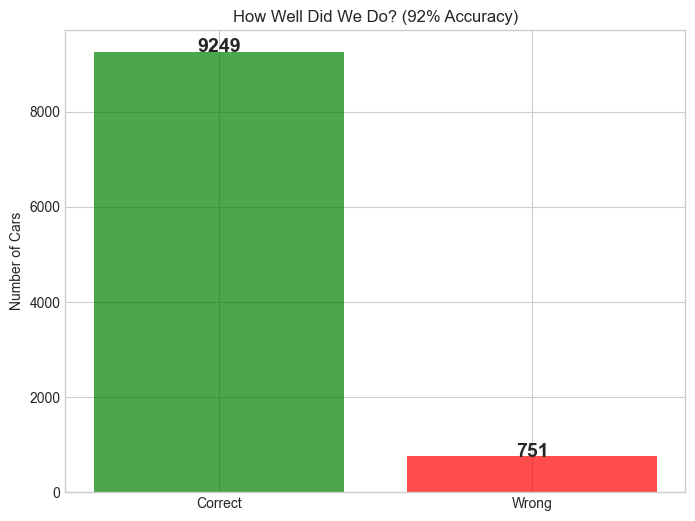

In [9]:
# Visual bar chart of results
fig, ax = plt.subplots(figsize=(8, 6))

categories = ['Correct', 'Wrong']
counts = [correct, total - correct]
colors = ['green', 'red']

ax.bar(categories, counts, color=colors, alpha=0.7)
ax.set_ylabel('Number of Cars')
ax.set_title(f'How Well Did We Do? ({accuracy:.0%} Accuracy)')

# Add numbers on bars
for i, (cat, count) in enumerate(zip(categories, counts)):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=14, fontweight='bold')

plt.show()

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)

print("CLASSIFICATION METRICS EXPLAINED:")
print("=" * 50)
print()
print("Accuracy")
print(f"   Your Accuracy: {accuracy:.1%}")
print(f"   In numbers: {int(accuracy * len(y_test_class))} correct out of {len(y_test_class)}")
print("   What it means: Percentage of correct predictions")
print("   Think of it as: Your test score")
print("   Goal: Higher is better (100% = perfect)")
print()
print("Quick Guide for Accuracy:")
print("   > 90% = Excellent!")
print("   80-90% = Very good")
print("   70-80% = Good")
print("   60-70% = OK")
print("   < 60% = Needs work")

CLASSIFICATION METRICS EXPLAINED:

Accuracy
   Your Accuracy: 92.5%
   In numbers: 9249 correct out of 10000
   What it means: Percentage of correct predictions
   Think of it as: Your test score
   Goal: Higher is better (100% = perfect)

Quick Guide for Accuracy:
   > 90% = Excellent!
   80-90% = Very good
   70-80% = Good
   60-70% = OK
   < 60% = Needs work


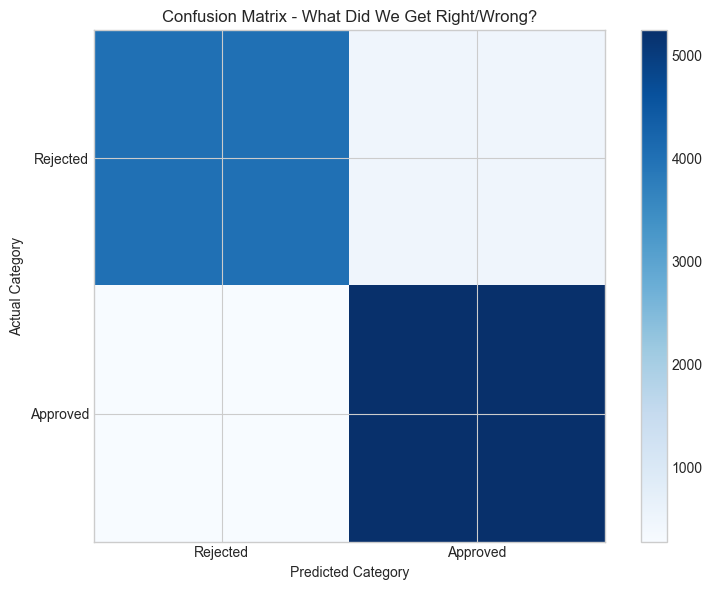

How to Read This:
  • Top-left (4010): Loan Status correctly identified as Approved
  • Bottom-right (5239): Loan Status correctly identified as Approved
  • Top-right (473): Loan Status wrongly called Rejected
  • Bottom-left (278): Loan Status wrongly called Rejected

We want big numbers on the diagonal (top-left to bottom-right)!


In [11]:
# Confusion Matrix - shows what we got right and wrong
cm = confusion_matrix(y_test_class, y_pred_class)

# Visualise confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - What Did We Get Right/Wrong?')
plt.colorbar()

# Add labels
classes = ['Rejected', 'Approved']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)


plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.tight_layout()
plt.show()

print("How to Read This:")
print(f"  • Top-left ({cm[0,0]}): Loan Status correctly identified as Approved")
print(f"  • Bottom-right ({cm[1,1]}): Loan Status correctly identified as Approved")
print(f"  • Top-right ({cm[0,1]}): Loan Status wrongly called Rejected")
print(f"  • Bottom-left ({cm[1,0]}): Loan Status wrongly called Rejected")
print()
print(f"We want big numbers on the diagonal (top-left to bottom-right)!")

In [19]:
#accuracy = accuracy_score(y_test_class, y_pred_class)
#accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print("Accuracy")
print(f"   Value: {accuracy:.1%}")
print(f"   Meaning: Overall correct predictions\n")

print("Precision")
print(f"   Value: {precision:.1%}")
print(f"   Meaning: When we predict 'Approved', how often are we right?")
print(f"   Use when: False positives are costly\n")

print("Recall")
print(f"   Value: {recall:.1%}")
print(f"   Meaning: Of all actual 'Approved' cars, how many did we find?")
print(f"   Use when: Missing positives is costly\n")

print("F1 Score")
print(f"   Value: {f1:.1%}")
print(f"   Meaning: Balance between Precision and Recall")
print(f"   Formula: 2 × (Precision × Recall) / (Precision + Recall)")
print(f"   Use when: You want balanced performance\n")

print("💡 Real Example - Spam Filter:")
print("   High Precision = Few real emails marked as spam (good!)")
print("   High Recall = Most spam emails caught (good!)")
print("   F1 Score = Overall spam filter quality")

Accuracy
   Value: 92.5%
   Meaning: Overall correct predictions

Precision
   Value: 91.7%
   Meaning: When we predict 'Approved', how often are we right?
   Use when: False positives are costly

Recall
   Value: 95.0%
   Meaning: Of all actual 'Approved' cars, how many did we find?
   Use when: Missing positives is costly

F1 Score
   Value: 93.3%
   Meaning: Balance between Precision and Recall
   Formula: 2 × (Precision × Recall) / (Precision + Recall)
   Use when: You want balanced performance

💡 Real Example - Spam Filter:
   High Precision = Few real emails marked as spam (good!)
   High Recall = Most spam emails caught (good!)
   F1 Score = Overall spam filter quality
